In [ ]:
#time series date vs. sentiment score -all the reviews vs. top 5 reviewed branches
#same graph for all the years

In [2]:
#split the date part to year and month
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [3]:
#Read the dataframe with predicted sentiment scores
LLM_predicts = pd.read_json('LLM\\LLM_predicts_merge_roberta.json', lines=True)

In [4]:
LLM_predicts["year"] = LLM_predicts["date"].dt.year
LLM_predicts["month"] = LLM_predicts["date"].dt.month
LLM_predicts["day"] = LLM_predicts["date"].dt.day
LLM_predicts

,business_id,text,city,date,stars_3_scale,address,llm_sentiment,roberta_score,year,month,day
0,aJvxWyQIG5OLfBw3qAe8xA,"Ordered Caramel frappe at Drive thru, BIG MIST...",Nashville,2017-12-29 19:38:31,1,2308 Murfreesboro Pike,1,2,2017,12,29
1,MjZQqZAmJeMco_Vq-Y9h-g,Drum-roll please! Review #100 coming right up!...,Carmel,2014-02-05 19:38:24,3,13170 North Hazel Dell Pkwy,3,3,2014,2,5
2,u7MJKcNdZXYyTeb67vD5jw,We stopped here for my Chai and Hubby's coffee...,Mount Laurel,2017-02-09 04:35:39,3,5 Hartford Rd,3,3,2017,2,9
3,saJFbz12EnzanelpD8_xXQ,There's been three times that I've ordered a g...,Riverview,2016-08-25 14:08:18,1,10716 Big Bend Rd,1,2,2016,8,25
4,KiE0h68HGOO7ZXAqkMBdiw,"I went in when they had 4 people working, wait...",Santa Barbara,2016-01-30 01:10:42,1,1015 De La Vina St,1,1,2016,1,30
...,...,...,...,...,...,...,...,...,...,...,...
21548,-85kJMtb9wqNWDT8yLbitw,Fair service- messed up my drink cuppa times....,Franklin,2021-12-13 22:08:14,2,"438 Main St, Space 168, Space 168",1,1,2021,12,13
21549,Ddg-J_j0YFErk7wpMtH_0A,On my way out of Reno last week I noted a new ...,Reno,2021-12-28 19:26:37,3,986 Ambassador Dr,3,3,2021,12,28
21550,2rmpfdyV2POqpXtmPHO_IQ,always closing drive thru. i've driven here so...,Tucson,2021-12-28 18:12:04,1,6363 N La Cholla,1,1,2021,12,28
21551,GxuxCctcz3Hyk0wnuly7vQ,This is now one of two Starbucks in the shoppi...,Tucson,2017-01-21 00:19:27,3,4811 E Grant,3,3,2017,1,21


In [ ]:
#gruoup by day city, rolling average by 7 days
#LLM_predicts = LLM_predicts.groupby(['day', 'city']).agg({'llm_sentiment': 'mean'}).reset_index()

In [5]:
# Group by day and city, compute mean sentiment_score
grouped = LLM_predicts.groupby(["date", 'city']).agg({'llm_sentiment': 'mean'}).reset_index()

# Ensure day is datetime and sort for correct rolling
grouped['date'] = pd.to_datetime(grouped['date'])
grouped = grouped.sort_values('date')

# Set day as index for rolling
grouped = grouped.set_index('date')

# Calculate 7-day rolling average for each city
result = grouped.groupby('city')['llm_sentiment'].rolling('7D').mean().reset_index()


In [ ]:
result

In [ ]:
v = LLM_predicts[['city', 'year']].value_counts().sort_values(ascending=False)
v

In [ ]:
v = LLM_predicts['llm_sentiment'].value_counts()
v

In [ ]:
LLM_predicts["year"].unique()

In [ ]:
year = 2021
cities = ['Philadelphia', 'Indianapolis', 'Tampa', 'Tucson', 'Reno']  # replace with your actual city names
filtered_df = LLM_predicts[(LLM_predicts["year"] == year) & (LLM_predicts["city"].isin(cities))]


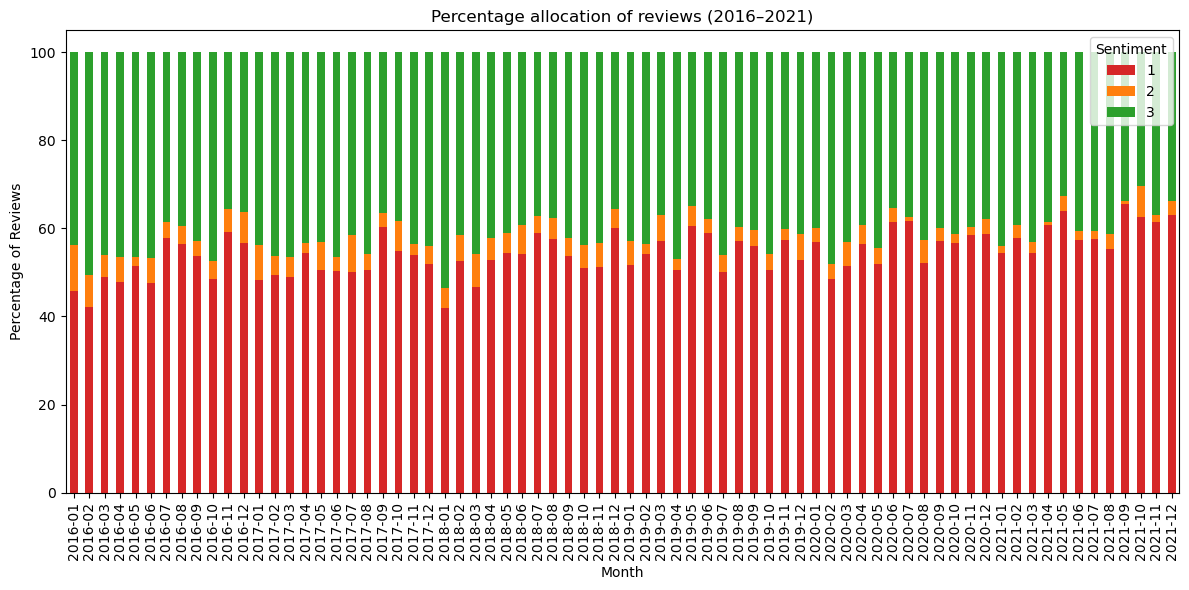

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime and extract month and year
LLM_predicts['date'] = pd.to_datetime(LLM_predicts['date'])
LLM_predicts['month'] = LLM_predicts['date'].dt.to_period('M')
LLM_predicts['year'] = LLM_predicts['date'].dt.year

# Filter for years 2016 to 2021
filtered_df = LLM_predicts[(LLM_predicts['year'] >= 2016) & (LLM_predicts['year'] <= 2021)]

# Group by month and sentiment, count occurrences
sentiment_counts = filtered_df.groupby(['month', 'llm_sentiment']).size().unstack(fill_value=0)

# Calculate percentage for each sentiment per month
sentiment_percent = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Plot as stacked bar chart
sentiment_percent.plot(
    kind='bar',
    stacked=True,
    color=['#d62728', '#ff7f0e', '#2ca02c'],  # red=negative, orange=neutral, green=positive
    figsize=(12, 6)
)
plt.ylabel('Percentage of Reviews')
plt.xlabel('Month')
plt.title('Percentage allocation of reviews (2016–2021)')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


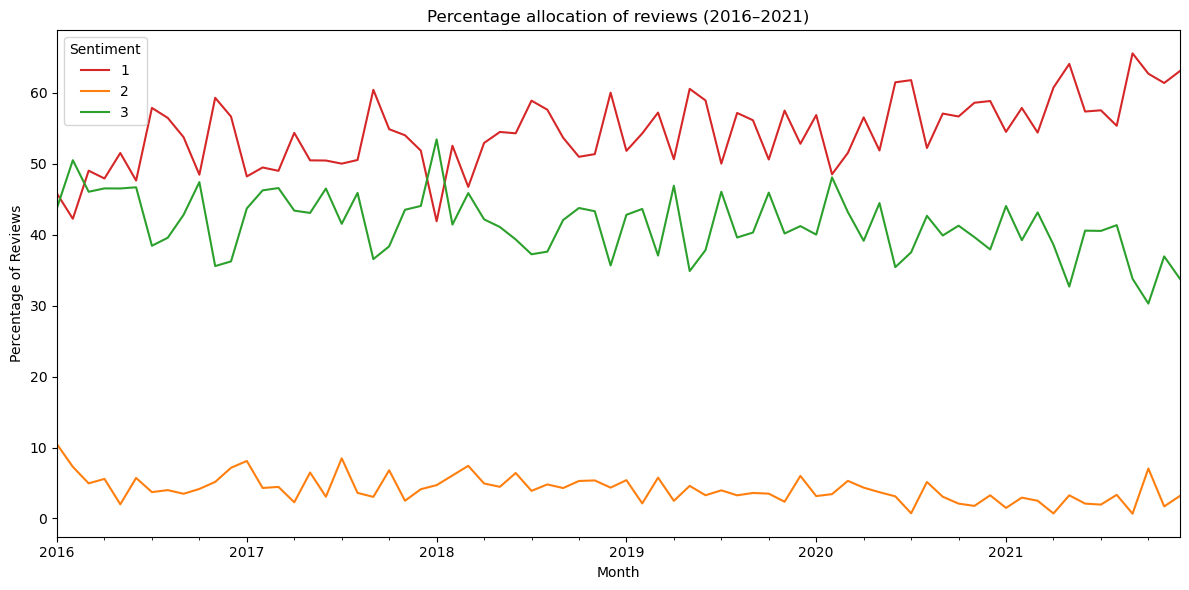

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime and extract month and year
LLM_predicts['date'] = pd.to_datetime(LLM_predicts['date'])
LLM_predicts['month'] = LLM_predicts['date'].dt.to_period('M')
LLM_predicts['year'] = LLM_predicts['date'].dt.year

# Filter for years 2016 to 2021
filtered_df = LLM_predicts[(LLM_predicts['year'] >= 2016) & (LLM_predicts['year'] <= 2021)]

# Group by month and sentiment, count occurrences
sentiment_counts = filtered_df.groupby(['month', 'llm_sentiment']).size().unstack(fill_value=0)

# Calculate percentage for each sentiment per month
sentiment_percent = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Plot as stacked bar chart
sentiment_percent.plot(
    kind='line',
    #stacked=True,
    color=['#d62728', '#ff7f0e', '#2ca02c'],  # red=negative, orange=neutral, green=positive
    figsize=(12, 6)
)
plt.ylabel('Percentage of Reviews')
plt.xlabel('Month')
plt.title('Percentage allocation of reviews (2016–2021)')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
